<a href="https://colab.research.google.com/github/Untick/InspectrumClinic_RecSys/blob/main/alexeigrebnyov/DatasetParse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Библиотека работы с массивами
import numpy as np

# Библиотека для работы с таблицами
import pandas as pd

# Последовательная модель НС
from tensorflow.keras.models import Sequential

# Основные слои
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization

# Слой задания активационной функции <----- !!!
from tensorflow.keras.layers import Activation

# Утилиты предобработки данных
from tensorflow.keras import utils
from keras_tuner.tuners import RandomSearch, Hyperband, BayesianOptimization

# Оптимизаторы
from tensorflow.keras.optimizers import Adam

# Разделение на обучающую и проверочную/тестовую выборку
from sklearn.model_selection import train_test_split

# Рисование графиков
import matplotlib.pyplot as plt
import statistics
import re
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import random
import os
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from scipy import stats

%matplotlib inline

In [ ]:
# Загрузка датасета
df_CAT=pd.read_excel('семпл датасета.xlsx', sheet_name='Лист2')
df_CAT

,ДокументПрохождениеМедосмотра,Клиент,КлиентДатаРождения,КлиентПол,КлиентПолПредставление,ДатаЗавершенияМедосмотра,ТипМедосмотра,ТипМедосмотраПредставление,ПсихОсвидетельствование,Контрагент,...,Стоматология1_Классификация1Представление2,Стоматология1_Классификация22,Стоматология1_Классификация2Представление2,Стоматология1_Классификация32,Стоматология1_Классификация3Представление2,Стоматология1_Противопоказание2,Стоматология1_ПротивопоказаниеПредставление2,Стоматология1_Профессиональное2,Стоматология1_ПрофнепригодностьВременная2,Стоматология1_ПрофнепригодностьВременнаяПредставление2
0,9688ac7c-dd74-11ec-8100-0cc47aab8067,11ba74dd-5503-11e8-80ce-0cc47aab8067,1972-03-05,Женский,Женский,2022-05-27,Периодический,Периодический,0.0,a1e92db1-2ea1-11e9-80ce-0cc47aab8067,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,df26abd0-dfdc-11ec-8100-0cc47aab8067,11ba74df-5503-11e8-80ce-0cc47aab8067,1988-09-16,Женский,Женский,2022-05-30,Периодический,Периодический,0.0,a1e92db1-2ea1-11e9-80ce-0cc47aab8067,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,8c158fb4-dfe4-11ec-8100-0cc47aab8067,5f637b0b-dd0e-11ec-8100-0cc47aab8067,2002-05-26,Женский,Женский,2022-05-30,Периодический,Периодический,0.0,a1e92db1-2ea1-11e9-80ce-0cc47aab8067,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,456762a8-e092-11ec-8101-0cc47aab8067,11ba74e4-5503-11e8-80ce-0cc47aab8067,1968-03-16,Женский,Женский,2022-05-31,Периодический,Периодический,0.0,a1e92db1-2ea1-11e9-80ce-0cc47aab8067,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,412031b1-e095-11ec-8101-0cc47aab8067,7afbc5e9-0c2d-11ea-80d3-0cc47aab8067,1974-06-17,Женский,Женский,2022-05-31,Периодический,Периодический,0.0,a1e92db1-2ea1-11e9-80ce-0cc47aab8067,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,01347bd0-6fa4-11ed-8109-0cc47aab8067,46869f09-6efc-11ed-8109-0cc47aab8067,1983-11-18,Мужской,Мужской,2022-11-29,Периодический,Периодический,0.0,04d5e72c-6efc-11ed-8109-0cc47aab8067,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
108,10652eec-6fa5-11ed-8109-0cc47aab8067,c777b932-51ad-11ec-80fc-0cc47aab8067,1987-08-19,Женский,Женский,2022-11-29,Периодический,Периодический,0.0,b6882c37-6716-11e9-80ce-0cc47aab8067,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
109,f1beb089-6fa8-11ed-8109-0cc47aab8067,abd2610d-1832-11e7-80d3-708bcd7f83cd,1980-06-25,Мужской,Мужской,2022-11-29,Периодический,Периодический,1.0,173d6ba7-12fe-11e7-80d3-708bcd7f83cd,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
110,c4ebcfec-6fac-11ed-8109-0cc47aab8067,fccc048a-b984-11e7-80de-708bcd7f83cd,1966-01-26,Мужской,Мужской,2022-11-29,Периодический,Периодический,1.0,173d6ba7-12fe-11e7-80d3-708bcd7f83cd,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Удаляем столбцы где все значения NAN
df_cutted=df_CAT.dropna(axis=1, how='all')
df_cutted=df_cutted.drop(columns=['ДокументПрохождениеМедосмотра', 'Клиент'])

In [ ]:
# В остальных столбцах заменяем NAN на 0 соответствующего типа
import datetime
for i in df_cutted.columns.values.tolist():
    if df_cutted[i].dtypes==object:
       df_cutted[i]= df_cutted[i].fillna('0')
    elif df_cutted[i].dtypes==int or  df_cutted[i].dtypes==float:
       df_cutted[i]= df_cutted[i].fillna(0)
    else:
        df_cutted[i]= df_cutted[i].fillna(datetime.datetime.min )

In [ ]:
# Проверяем тип данных в полученном датасете
d={}
for i in df_cutted.columns.values.tolist():
    l=df_cutted[i].unique() 
    l1=[]
    for j in range(l.size):
        l1.append(type(l[j]))
    d.update({i:l1 })
d

{'КлиентДатаРождения': [pandas._libs.tslibs.timestamps.Timestamp,
  pandas._libs.tslibs.timestamps.Timestamp,
  pandas._libs.tslibs.timestamps.Timestamp,
  pandas._libs.tslibs.timestamps.Timestamp,
  pandas._libs.tslibs.timestamps.Timestamp,
  pandas._libs.tslibs.timestamps.Timestamp,
  pandas._libs.tslibs.timestamps.Timestamp,
  pandas._libs.tslibs.timestamps.Timestamp,
  pandas._libs.tslibs.timestamps.Timestamp,
  pandas._libs.tslibs.timestamps.Timestamp,
  pandas._libs.tslibs.timestamps.Timestamp,
  pandas._libs.tslibs.timestamps.Timestamp,
  pandas._libs.tslibs.timestamps.Timestamp,
  pandas._libs.tslibs.timestamps.Timestamp,
  pandas._libs.tslibs.timestamps.Timestamp,
  pandas._libs.tslibs.timestamps.Timestamp,
  pandas._libs.tslibs.timestamps.Timestamp,
  pandas._libs.tslibs.timestamps.Timestamp,
  pandas._libs.tslibs.timestamps.Timestamp,
  pandas._libs.tslibs.timestamps.Timestamp,
  pandas._libs.tslibs.timestamps.Timestamp,
  pandas._libs.tslibs.timestamps.Timestamp,
  pandas._

In [ ]:
# Отбираем столбцы с большим количеством уникальных значений
for i in d.keys():
    if len(d.get(i))>10:
        print(i, len(d.get(i)), sep=' ')

КлиентДатаРождения 110
ДатаЗавершенияМедосмотра 27
Контрагент 17
Профессия 67
ВредныеФакторы 47
Функциональная_Диагностика1_ДокументПрием 98
Функциональная_Диагностика1_ДатаПриема 98
Оториноларингология1_ДокументПрием 86
Оториноларингология1_ДатаПриема 85
Гинекология1_ДокументПрием 39
Гинекология1_ДатаПриема 38
Хирургия1_ДокументПрием 61
Хирургия1_ДатаПриема 61
Офтальмология1_ДокументПрием 83
Офтальмология1_ДатаПриема 83
Офтальмология1_Детализация1 30
Рентгенология1_ДокументПрием 23
Рентгенология1_ДатаПриема 22
УЗИ_Диагностика1_ДокументПрием 58
УЗИ_Диагностика1_ДатаПриема 58
Психиатрия_Наркология1_ДокументПрием 102
Психиатрия_Наркология1_ДатаПриема 102
Неврология1_ДокументПрием 102
Неврология1_ДатаПриема 101
Лабораторные_Исследования1_ДокументПрием 82
Лабораторные_Исследования1_ДатаПриема 82
Терапия1_ДокументПрием 104
Терапия1_ДатаПриема 104
Дерматовенерология1_ДокументПрием 42
Дерматовенерология1_ДатаПриема 42
Процедурная_Медсестра1_ДокументПрием 21
Процедурная_Медсестра1_ДатаПриема 2

In [ ]:
# В основном это столбцы с кодами документов не представляющие интереса для обучения, а также дублирующие столбцы (представление). Отберем их
excp=[]
for i in d.keys():
    item=d.get(i)
    if ('ДокументПрием' in i) or ('ДатаПрием' in i)or ('Представление' in i):
        excp.append(i)
excp

['КлиентПолПредставление',
 'ТипМедосмотраПредставление',
 'ЗаключениеМКПредставление',
 'ДиспансернаяГруппаПредставление',
 'Функциональная_Диагностика1_ДокументПрием',
 'Функциональная_Диагностика1_ДатаПриема',
 'Функциональная_Диагностика1_СалонПредставление',
 'Функциональная_Диагностика1_СпециализацияПредставление',
 'Функциональная_Диагностика1_ХР_Рекомендация1Представление',
 'Функциональная_Диагностика1_ХР_Рекомендация2Представление',
 'Оториноларингология1_ДокументПрием',
 'Оториноларингология1_ДатаПриема',
 'Оториноларингология1_СалонПредставление',
 'Оториноларингология1_СпециализацияПредставление',
 'Оториноларингология1_ДиагнозПредставление1',
 'Оториноларингология1_Классификация2Представление1',
 'Оториноларингология1_Классификация3Представление1',
 'Оториноларингология1_ПротивопоказаниеПредставление1',
 'Оториноларингология1_ПрофнепригодностьВременнаяПредставление1',
 'Гинекология1_ДокументПрием',
 'Гинекология1_ДатаПриема',
 'Гинекология1_СалонПредставление',
 'Гинеколо

In [ ]:
# И удалим
df_new=df_cutted.drop(columns=excp)
df_new

,КлиентДатаРождения,КлиентПол,ДатаЗавершенияМедосмотра,ТипМедосмотра,ПсихОсвидетельствование,Контрагент,Цех,Профессия,ЗаключениеМК,Заключение,...,Оториноларингология2_Специализация,Оториноларингология2_ХР_Рекомендация1,Оториноларингология2_ХР_Рекомендация2,Оториноларингология2_МКБ101,Оториноларингология2_Противопоказание1,Оториноларингология2_Профессиональное1,Оториноларингология2_ПрофнепригодностьВременная1,Стоматология1_МКБ102,Стоматология1_Противопоказание2,Стоматология1_Профессиональное2
0,1972-03-05 00:00:00,Женский,2022-05-27 00:00:00,Периодический,0.0,a1e92db1-2ea1-11e9-80ce-0cc47aab8067,0,Мойщик ВС 2 разряда,ГоденСКоррекциейЗрения,Годен к работе в указанных условиях (с коррекц...,...,0,0,0,0,0,0.0,0,0,0,0.0
1,1988-09-16 00:00:00,Женский,2022-05-30 00:00:00,Периодический,0.0,a1e92db1-2ea1-11e9-80ce-0cc47aab8067,0,Кладовщик-комплектовщик,Годен,Годен к работе в указанных условиях,...,0,0,0,0,0,0.0,0,0,0,0.0
2,2002-05-26 00:00:00,Женский,2022-05-30 00:00:00,Периодический,0.0,a1e92db1-2ea1-11e9-80ce-0cc47aab8067,Без отдела,Кладовщик комплектовщик,Годен,Годен к работе в указанных условиях,...,0,0,0,0,0,0.0,0,0,0,0.0
3,1968-03-16 00:00:00,Женский,2022-05-31 00:00:00,Периодический,0.0,a1e92db1-2ea1-11e9-80ce-0cc47aab8067,0,Мойщик службы БОВС,Годен,Годен к работе в указанных условиях,...,0,0,0,0,0,0.0,0,0,0,0.0
4,1974-06-17 00:00:00,Женский,2022-05-31 00:00:00,Периодический,0.0,a1e92db1-2ea1-11e9-80ce-0cc47aab8067,0,Мойщик службы БОВС,Годен,Годен к работе в указанных условиях,...,0,0,0,0,0,0.0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,1983-11-18 00:00:00,Мужской,2022-11-29 00:00:00,Периодический,0.0,04d5e72c-6efc-11ed-8109-0cc47aab8067,0,Терапевт-ортопед,0,0,...,0,0,0,0,0,0.0,0,0,0,0.0
108,1987-08-19 00:00:00,Женский,2022-11-29 00:00:00,Периодический,0.0,b6882c37-6716-11e9-80ce-0cc47aab8067,Ооо «территория еды 102»,Повар,0,0,...,0,0,0,0,0,0.0,0,0,0,0.0
109,1980-06-25 00:00:00,Мужской,2022-11-29 00:00:00,Периодический,1.0,173d6ba7-12fe-11e7-80d3-708bcd7f83cd,0,Техник-геофизик,0,0,...,0,0,0,0,0,0.0,0,0,0,0.0
110,1966-01-26 00:00:00,Мужской,2022-11-29 00:00:00,Периодический,1.0,173d6ba7-12fe-11e7-80d3-708bcd7f83cd,0,Машинист электростанции передвижной 6 разряда,0,0,...,0,0,0,0,0,0.0,0,0,0,0.0


In [ ]:
# Еще один столбец с кодами. Тоже удаляем
df_new=df_new.drop(columns=['Контрагент'])

In [ ]:

df_new.describe()

,ПсихОсвидетельствование,Оториноларингология1_Классификация21,Хирургия1_Профессиональное1,Рентгенология1_Классификация21,Рентгенология1_Профессиональное1,Психиатрия_Наркология1_Профессиональное1,Неврология1_Профессиональное1,Терапия1_Профессиональное1,Дерматовенерология1_Профессиональное1,Терапия1_Профессиональное2,...,Функциональная_Диагностика1_Профессиональное1,Стоматология1_Профессиональное1,Неврология1_Профессиональное2,Офтальмология1_Профессиональное2,УЗИ_Диагностика1_Профессиональное2,Оториноларингология1_Профессиональное2,Хирургия2_Профессиональное1,Офтальмология2_Профессиональное1,Оториноларингология2_Профессиональное1,Стоматология1_Профессиональное2
count,112.000000,112.0,112.0,112.0,112.0,112.0,112.0,112.0,112.0,112.0,...,112.0,112.0,112.0,112.0,112.0,112.0,112.0,112.0,112.0,112.0
mean,0.035714,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,0.186411,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:

d0=[]
for i in df_new.columns.values.tolist():
    if df_new[i][df_new[i]==0].count()==112:
        d0.append(i)
d0

['Оториноларингология1_Классификация21',
 'Хирургия1_Профессиональное1',
 'Рентгенология1_Классификация21',
 'Рентгенология1_Профессиональное1',
 'Психиатрия_Наркология1_Профессиональное1',
 'Неврология1_Профессиональное1',
 'Терапия1_Профессиональное1',
 'Дерматовенерология1_Профессиональное1',
 'Терапия1_Профессиональное2',
 'Лабораторные_Исследования1_Профессиональное1',
 'Терапия2_Профессиональное1',
 'Хирург_Не_Исп_1_Профессиональное1',
 'УЗИ_Диагностика1_Профессиональное1',
 'Терапия1_Профессиональное3',
 'Психиатрия1_Профессиональное1',
 'Функциональная_Диагностика1_Профессиональное1',
 'Стоматология1_Профессиональное1',
 'Неврология1_Профессиональное2',
 'Офтальмология1_Профессиональное2',
 'УЗИ_Диагностика1_Профессиональное2',
 'Оториноларингология1_Профессиональное2',
 'Хирургия2_Профессиональное1',
 'Офтальмология2_Профессиональное1',
 'Оториноларингология2_Профессиональное1',
 'Стоматология1_Профессиональное2']

In [ ]:
df_new=df_new.drop(columns=d0)
df_new

,КлиентДатаРождения,КлиентПол,ДатаЗавершенияМедосмотра,ТипМедосмотра,ПсихОсвидетельствование,Цех,Профессия,ЗаключениеМК,Заключение,ДиспансернаяГруппа,...,Функциональная_Диагностика2_ХР_Рекомендация2,Оториноларингология2_Салон,Оториноларингология2_Специализация,Оториноларингология2_ХР_Рекомендация1,Оториноларингология2_ХР_Рекомендация2,Оториноларингология2_МКБ101,Оториноларингология2_Противопоказание1,Оториноларингология2_ПрофнепригодностьВременная1,Стоматология1_МКБ102,Стоматология1_Противопоказание2
0,1972-03-05 00:00:00,Женский,2022-05-27 00:00:00,Периодический,0.0,0,Мойщик ВС 2 разряда,ГоденСКоррекциейЗрения,Годен к работе в указанных условиях (с коррекц...,II,...,0,0,0,0,0,0,0,0,0,0
1,1988-09-16 00:00:00,Женский,2022-05-30 00:00:00,Периодический,0.0,0,Кладовщик-комплектовщик,Годен,Годен к работе в указанных условиях,I,...,0,0,0,0,0,0,0,0,0,0
2,2002-05-26 00:00:00,Женский,2022-05-30 00:00:00,Периодический,0.0,Без отдела,Кладовщик комплектовщик,Годен,Годен к работе в указанных условиях,I,...,0,0,0,0,0,0,0,0,0,0
3,1968-03-16 00:00:00,Женский,2022-05-31 00:00:00,Периодический,0.0,0,Мойщик службы БОВС,Годен,Годен к работе в указанных условиях,IIIа,...,0,0,0,0,0,0,0,0,0,0
4,1974-06-17 00:00:00,Женский,2022-05-31 00:00:00,Периодический,0.0,0,Мойщик службы БОВС,Годен,Годен к работе в указанных условиях,IIIа,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,1983-11-18 00:00:00,Мужской,2022-11-29 00:00:00,Периодический,0.0,0,Терапевт-ортопед,0,0,0,...,0,0,0,0,0,0,0,0,0,0
108,1987-08-19 00:00:00,Женский,2022-11-29 00:00:00,Периодический,0.0,Ооо «территория еды 102»,Повар,0,0,0,...,0,0,0,0,0,0,0,0,0,0
109,1980-06-25 00:00:00,Мужской,2022-11-29 00:00:00,Периодический,1.0,0,Техник-геофизик,0,0,0,...,0,0,0,0,0,0,0,0,0,0
110,1966-01-26 00:00:00,Мужской,2022-11-29 00:00:00,Периодический,1.0,0,Машинист электростанции передвижной 6 разряда,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
from dateutil.relativedelta import relativedelta

dates={}
vals=[]
for i in range(df_new['КлиентДатаРождения'].size):
    d1 = df_new['КлиентДатаРождения'][i]
    d2 = df_new['ДатаЗавершенияМедосмотра'][i]
    vals.append(relativedelta(d2, d1).years)
dates.update({'dateDiff':vals})
dates

{'dateDiff': [50,
  33,
  20,
  54,
  47,
  39,
  51,
  57,
  43,
  50,
  53,
  58,
  61,
  64,
  46,
  35,
  31,
  50,
  47,
  29,
  53,
  30,
  57,
  43,
  46,
  34,
  53,
  60,
  43,
  44,
  51,
  39,
  52,
  0,
  29,
  43,
  27,
  36,
  40,
  53,
  50,
  28,
  27,
  38,
  39,
  55,
  56,
  35,
  60,
  31,
  29,
  40,
  40,
  40,
  30,
  26,
  47,
  34,
  52,
  52,
  0,
  24,
  47,
  61,
  56,
  53,
  52,
  32,
  36,
  27,
  27,
  32,
  23,
  36,
  54,
  49,
  39,
  23,
  18,
  28,
  39,
  24,
  69,
  42,
  54,
  51,
  46,
  58,
  53,
  59,
  61,
  45,
  49,
  55,
  56,
  36,
  51,
  40,
  66,
  57,
  53,
  46,
  47,
  45,
  47,
  32,
  37,
  39,
  35,
  42,
  56,
  53]}

In [ ]:
df_app=pd.DataFrame.from_dict(dates)
df_new=pd.concat((df_new, df_app), axis=1)
df_new

,КлиентДатаРождения,КлиентПол,ДатаЗавершенияМедосмотра,ТипМедосмотра,ПсихОсвидетельствование,Цех,Профессия,ЗаключениеМК,Заключение,ДиспансернаяГруппа,...,Оториноларингология2_Салон,Оториноларингология2_Специализация,Оториноларингология2_ХР_Рекомендация1,Оториноларингология2_ХР_Рекомендация2,Оториноларингология2_МКБ101,Оториноларингология2_Противопоказание1,Оториноларингология2_ПрофнепригодностьВременная1,Стоматология1_МКБ102,Стоматология1_Противопоказание2,dateDiff
0,1972-03-05 00:00:00,Женский,2022-05-27 00:00:00,Периодический,0.0,0,Мойщик ВС 2 разряда,ГоденСКоррекциейЗрения,Годен к работе в указанных условиях (с коррекц...,II,...,0,0,0,0,0,0,0,0,0,50
1,1988-09-16 00:00:00,Женский,2022-05-30 00:00:00,Периодический,0.0,0,Кладовщик-комплектовщик,Годен,Годен к работе в указанных условиях,I,...,0,0,0,0,0,0,0,0,0,33
2,2002-05-26 00:00:00,Женский,2022-05-30 00:00:00,Периодический,0.0,Без отдела,Кладовщик комплектовщик,Годен,Годен к работе в указанных условиях,I,...,0,0,0,0,0,0,0,0,0,20
3,1968-03-16 00:00:00,Женский,2022-05-31 00:00:00,Периодический,0.0,0,Мойщик службы БОВС,Годен,Годен к работе в указанных условиях,IIIа,...,0,0,0,0,0,0,0,0,0,54
4,1974-06-17 00:00:00,Женский,2022-05-31 00:00:00,Периодический,0.0,0,Мойщик службы БОВС,Годен,Годен к работе в указанных условиях,IIIа,...,0,0,0,0,0,0,0,0,0,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,1983-11-18 00:00:00,Мужской,2022-11-29 00:00:00,Периодический,0.0,0,Терапевт-ортопед,0,0,0,...,0,0,0,0,0,0,0,0,0,39
108,1987-08-19 00:00:00,Женский,2022-11-29 00:00:00,Периодический,0.0,Ооо «территория еды 102»,Повар,0,0,0,...,0,0,0,0,0,0,0,0,0,35
109,1980-06-25 00:00:00,Мужской,2022-11-29 00:00:00,Периодический,1.0,0,Техник-геофизик,0,0,0,...,0,0,0,0,0,0,0,0,0,42
110,1966-01-26 00:00:00,Мужской,2022-11-29 00:00:00,Периодический,1.0,0,Машинист электростанции передвижной 6 разряда,0,0,0,...,0,0,0,0,0,0,0,0,0,56


In [ ]:
df_new=df_new.drop(columns=['КлиентДатаРождения', 'ДатаЗавершенияМедосмотра'])

In [ ]:
dicts={}
for i in df_new.columns.values.tolist():
    if df_new[i].dtypes==object:
        c=0
        dl={}
        for j in df_new[i].unique():
            c+=1
            dl.update({j:c})
        dicts.update({i:dl})
dicts       
    

{'КлиентПол': {'Женский': 1, 'Мужской': 2, '0': 3},
 'ТипМедосмотра': {'Периодический': 1, '0': 2},
 'Цех': {'0': 1,
  'Без отдела': 2,
  'БИТУФА_НеВыявлена': 3,
  'Отдел технических решений и проектов': 4,
  'Администрация': 5,
  'Учебный отдел': 6,
  'Приволжский филиал фгуп "радон" благовещенское отделение': 7,
  'Бухгалтерия': 8,
  'Ооо «территория еды 102»': 9},
 'Профессия': {'Мойщик ВС 2 разряда': 1,
  'Кладовщик-комплектовщик': 2,
  'Кладовщик комплектовщик': 3,
  'Мойщик службы БОВС': 4,
  'Комплектовщик': 5,
  'Старший кладовщик': 6,
  'Уборщик производственных помещений': 7,
  'Агент-комплектовщик': 8,
  'Уборщик производственных помещений ': 9,
  'Слесарь по ремонту автомобилей 6 разряда': 10,
  'Слесарь по ремонту автомобилей': 11,
  'Испытатель двигателей 5 разряда': 12,
  'Охранник-водитель группы быстрого реагирования': 13,
  'Водитель автомобиля 6 разряда': 14,
  'Гардеробщик': 15,
  'Электро-монтажник-наладчик': 16,
  'Заведующий аптекой': 17,
  'Водитель': 18,
  'Год

In [ ]:
df_fl=df_new.copy()
for i in dicts.keys():
    for j in range(df_new[i].shape[0]):
        df_fl[i][j]=float(dicts.get(i).get(df_new[i][j]))
df_fl

,КлиентПол,ТипМедосмотра,ПсихОсвидетельствование,Цех,Профессия,ЗаключениеМК,Заключение,ДиспансернаяГруппа,ВредныеФакторы,Функциональная_Диагностика1_Салон,...,Оториноларингология2_Салон,Оториноларингология2_Специализация,Оториноларингология2_ХР_Рекомендация1,Оториноларингология2_ХР_Рекомендация2,Оториноларингология2_МКБ101,Оториноларингология2_Противопоказание1,Оториноларингология2_ПрофнепригодностьВременная1,Стоматология1_МКБ102,Стоматология1_Противопоказание2,dateDiff
0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,50
1,1.0,1.0,0.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,33
2,1.0,1.0,0.0,2.0,3.0,2.0,2.0,2.0,3.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,20
3,1.0,1.0,0.0,1.0,4.0,2.0,2.0,3.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,54
4,1.0,1.0,0.0,1.0,4.0,2.0,2.0,3.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,2.0,1.0,0.0,1.0,64.0,4.0,5.0,5.0,44.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,39
108,1.0,1.0,0.0,9.0,33.0,4.0,5.0,5.0,13.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,35
109,2.0,1.0,1.0,1.0,65.0,4.0,5.0,5.0,45.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,42
110,2.0,1.0,1.0,1.0,66.0,4.0,5.0,5.0,46.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,56


In [ ]:
df_fl=df_fl.astype(float)
df_fl

,КлиентПол,ТипМедосмотра,ПсихОсвидетельствование,Цех,Профессия,ЗаключениеМК,Заключение,ДиспансернаяГруппа,ВредныеФакторы,Функциональная_Диагностика1_Салон,...,Оториноларингология2_Салон,Оториноларингология2_Специализация,Оториноларингология2_ХР_Рекомендация1,Оториноларингология2_ХР_Рекомендация2,Оториноларингология2_МКБ101,Оториноларингология2_Противопоказание1,Оториноларингология2_ПрофнепригодностьВременная1,Стоматология1_МКБ102,Стоматология1_Противопоказание2,dateDiff
0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,50.0
1,1.0,1.0,0.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,33.0
2,1.0,1.0,0.0,2.0,3.0,2.0,2.0,2.0,3.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,20.0
3,1.0,1.0,0.0,1.0,4.0,2.0,2.0,3.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,54.0
4,1.0,1.0,0.0,1.0,4.0,2.0,2.0,3.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,47.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,2.0,1.0,0.0,1.0,64.0,4.0,5.0,5.0,44.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,39.0
108,1.0,1.0,0.0,9.0,33.0,4.0,5.0,5.0,13.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,35.0
109,2.0,1.0,1.0,1.0,65.0,4.0,5.0,5.0,45.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,42.0
110,2.0,1.0,1.0,1.0,66.0,4.0,5.0,5.0,46.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,56.0


In [ ]:
df_fl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Columns: 239 entries, КлиентПол to dateDiff
dtypes: float64(239)
memory usage: 209.2 KB


In [ ]:
df_fl=df_fl.drop(df_new[df_new['dateDiff']==0].index).reset_index(drop=True)
df_fl

,КлиентПол,ТипМедосмотра,ПсихОсвидетельствование,Цех,Профессия,ЗаключениеМК,Заключение,ДиспансернаяГруппа,ВредныеФакторы,Функциональная_Диагностика1_Салон,...,Оториноларингология2_Салон,Оториноларингология2_Специализация,Оториноларингология2_ХР_Рекомендация1,Оториноларингология2_ХР_Рекомендация2,Оториноларингология2_МКБ101,Оториноларингология2_Противопоказание1,Оториноларингология2_ПрофнепригодностьВременная1,Стоматология1_МКБ102,Стоматология1_Противопоказание2,dateDiff
0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,50.0
1,1.0,1.0,0.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,33.0
2,1.0,1.0,0.0,2.0,3.0,2.0,2.0,2.0,3.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,20.0
3,1.0,1.0,0.0,1.0,4.0,2.0,2.0,3.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,54.0
4,1.0,1.0,0.0,1.0,4.0,2.0,2.0,3.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,47.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,2.0,1.0,0.0,1.0,64.0,4.0,5.0,5.0,44.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,39.0
106,1.0,1.0,0.0,9.0,33.0,4.0,5.0,5.0,13.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,35.0
107,2.0,1.0,1.0,1.0,65.0,4.0,5.0,5.0,45.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,42.0
108,2.0,1.0,1.0,1.0,66.0,4.0,5.0,5.0,46.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,56.0


In [ ]:
for i in df_fl.columns.values.tolist():
   df_fl[i]= df_fl[i]/df_fl[i].max()

In [ ]:
x=df_fl.drop(columns=['Заключение']).reset_index(drop=True)
y=df_fl['Заключение']
x, y

(     КлиентПол  ТипМедосмотра  ПсихОсвидетельствование  Цех  Профессия  \
 0          1.0            1.0                      0.0  1.0        1.0   
 1          1.0            1.0                      0.0  1.0        2.0   
 2          1.0            1.0                      0.0  2.0        3.0   
 3          1.0            1.0                      0.0  1.0        4.0   
 4          1.0            1.0                      0.0  1.0        4.0   
 ..         ...            ...                      ...  ...        ...   
 105        2.0            1.0                      0.0  1.0       64.0   
 106        1.0            1.0                      0.0  9.0       33.0   
 107        2.0            1.0                      1.0  1.0       65.0   
 108        2.0            1.0                      1.0  1.0       66.0   
 109        2.0            1.0                      0.0  1.0       67.0   
 
      ЗаключениеМК  ДиспансернаяГруппа  ВредныеФакторы  \
 0             1.0                 1.0  

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, shuffle=True)

In [ ]:
# Получение списка значений разницы между y_test и pred
def test_pred_diff_plot(test, pred, method):
    l_dl=[]
    print(method)
    for i in range(0, len(test)):
        print(test[i],pred[i], sep=' ')
        dif=(abs(test[i]-pred[i])/test[i])*100
        if dif != float("inf"):
            l_dl.append(dif)
    return l_dl

In [ ]:
def ml_method_estim(method_list,  x_train, x_test, y_train, y_test):

#     x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

    y_train=np.reshape(y_train.values, (-1,1))
    y_test=np.reshape(y_test.values, (-1,1))

    methods=[]
    MAE_list=[]
    R_2_list=[]
    MSE_list=[]
    diff_list=[]
    valscore_list=[]
    plots=[]
    for i in method_list:
        model=i.fit(x_train, y_train)
        p1=model.predict(x_test)

        mae=mean_absolute_error(y_test, p1)
        r2=r2_score(y_test, p1)
        mse=mean_squared_error(y_test, p1)

        fold = KFold(n_splits=6, shuffle=True, random_state=5)
        # scores = cross_val_score(estimator = model,X=x_train_scaled, y=y_train_scaled,cv=fold)
        scores = cross_val_score(estimator = model,X=x_train, y=y_train,cv=fold)


        methods.append(str(i))
        MAE_list.append(mae)
        R_2_list.append(r2)
        MSE_list.append(mse)
        valscore_list.append(scores.mean())

        diff=test_pred_diff_plot(y_test, p1, i)
        plots.append(diff)
        diff_list.append(sum(diff)/len(y_test))

    method_col=pd.Series(methods)
    mae_col=pd.Series(MAE_list)
    r_2_col=pd.Series(R_2_list)
    mse_col=pd.Series(MSE_list)
    valscore_col=pd.Series(valscore_list)
    estim_df=pd.DataFrame({'method':method_col, 'mae':mae_col, 'r_2':r_2_col, 'mse':mse_col, 'mean_diff(%)':diff_list, 'mean_val_score':valscore_col})

    count=0
    for k in plots:
        plt.plot(k, label=str(count))
        count+=1
    plt.legend()
    plt.title('Величина различий реальных и предсказанных значений в % в зависимости от методики')
    plt.show()


    return estim_df


LinearRegression()
[2.] [2.53105072]
[2.] [2.62989547]
[2.] [2.29373594]
[5.] [-0.64672966]
[2.] [2.60703989]
[2.] [4.48384309]
[2.] [1.34921585]
[2.] [1.44488337]
[2.] [3.77654636]
[2.] [3.58157966]
[2.] [2.78580736]
KNeighborsRegressor(metric='euclidean', n_neighbors=6)
[2.] [2.]
[2.] [2.66666667]
[2.] [2.5]
[5.] [4.5]
[2.] [2.5]
[2.] [2.16666667]
[2.] [2.16666667]
[2.] [2.5]
[2.] [2.83333333]
[2.] [2.]
[2.] [2.]
RandomForestRegressor(max_depth=3, random_state=0)
[2.] 2.021289504077922
[2.] 2.3659005362903245
[2.] 2.021289504077922
[5.] 4.964249164578112
[2.] 2.021289504077922
[2.] 2.357997621215733
[2.] 2.043529815326694
[2.] 2.064130732403021
[2.] 2.669746507845426
[2.] 2.3659005362903245
[2.] 2.021289504077922
GradientBoostingRegressor(random_state=0)
[2.] 1.9566270412057205
[2.] 2.081968420786754
[2.] 1.9902785841599695
[5.] 4.957972633680413
[2.] 1.9968554721491805
[2.] 2.258738044276128
[2.] 1.9985055014165158
[2.] 1.9439910453230875
[2.] 3.408705291747839
[2.] 2.35898749530877

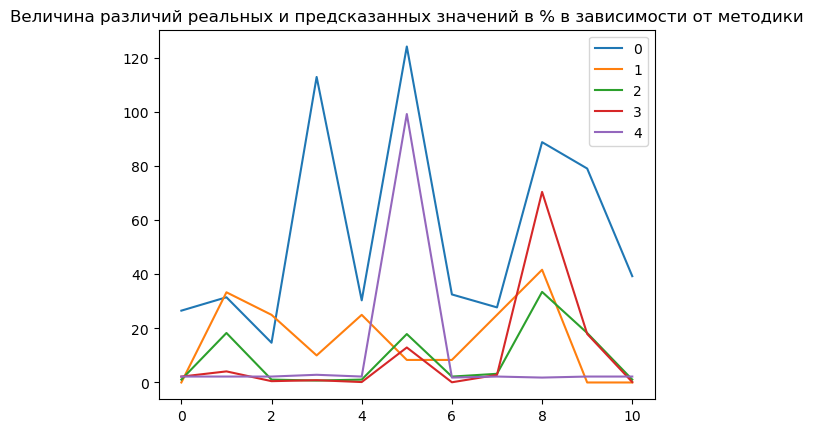

,method,mae,r_2,mse,mean_diff(%),mean_val_score
0,LinearRegression(),1.412921,-4.646089,4.199570,[55.24586890646986],-3.825483
1,"KNeighborsRegressor(metric='euclidean', n_neig...",0.348485,0.731790,0.199495,[16.060606060606062],0.107685
2,"RandomForestRegressor(max_depth=3, random_stat...",0.180738,0.895673,0.077599,[8.939382272054392],0.636972
3,GradientBoostingRegressor(random_state=0),0.206119,0.731858,0.199444,[10.191350373834883],0.596679
4,"XGBRegressor(base_score=0.5, booster='gbtree',...",0.227847,0.514107,0.361408,[11.004581234671853],0.560979


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import xgboost as xg
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

l=[LinearRegression(), KNeighborsRegressor(n_neighbors=6, metric='euclidean'), RandomForestRegressor(max_depth=3, random_state=0), GradientBoostingRegressor(random_state=0),xg.XGBRegressor(objective ='reg:linear', n_estimators = 10, seed = 123)]
ml_method_estim(l, x_train, x_test, y_train, y_test)

In [ ]:
def dl_method_estim(dl_method_list, x_dl_train, x_dl_test, y_dl_train,  y_dl_test):

#     x_dl_train, x_dl_test, y_dl_train,  y_dl_test = train_test_split(x, y, test_size=0.1, shuffle=True)


    y_dl_test =np.reshape(y_dl_test.values,(-1,1))
    y_dl_train =np.reshape(y_dl_train.values,(-1,1))
    plots=[]
    cols={}

    
    for i in dl_method_list:
        
        history=i.fit(x_dl_train, y_dl_train,   epochs=120, batch_size=4,   validation_split=0.1,   verbose=1)
        plt.plot(history.history['accuracy'],
                 label='Точность на обучающем наборе')           # Отрисовка графика обучения
        plt.plot(history.history['val_accuracy'],
                 label='Точность на проверочном наборе')
        plt.xlabel('Эпоха обучения')
        plt.ylabel('Точность')
        plt.legend()
        plt.show()

        pred=i.predict(x_dl_test)

        # График отношения реальных (test) и предсказанных(pred) значений. При текущем объеме выборки наверно малоинформативен.
        fig, ax = plt.subplots(figsize=(6, 6))
        ax.scatter(y_dl_test, pred)
        ax.plot(plt.xlim(), plt.ylim(), 'r')
        plt.xlabel('test')
        plt.ylabel('pred')
        plt.grid()
        plt.title('Соотношение реальных и предсказанных значений')
        plt.show()

        plots.append(test_pred_diff_plot(y_dl_test, pred, i))
    count=0
    # Сравнение различий реальных и предсказанных между разными архитектурами сетей
    for k in plots:
        plt.plot(k, label=str(count))
        cols[str(count)]=k
        count+=1
    plt.legend()
    plt.title('Величина различий реальных и предсказанных значений в % в зависимости от архитектуры сети')
    plt.show()
    print('Среднее значение %-та различий реальных и предсказанных значений: model_1: {:.3f}, model_2: {:.3f}'.format(float(sum(cols['0'])/len(cols['0'])), float(sum(cols['1'])/len(cols['1']))))
    # dl_table=pd.DataFrame(cols)
    return pd.DataFrame(cols)

In [ ]:
def get_dl_list(input_dim):
    dl_method_list=[]
    dl_model_1=Sequential()
    dl_model_1.add(Dense(64, input_dim=input_dim, activation='relu'))
    dl_model_1.add(Dense(32, activation='relu'))
    dl_model_1.add(Dense(1, activation='linear'))
    dl_model_1.compile(loss='mse',
                  optimizer=Adam(learning_rate=1e-5), metrics=['accuracy', 'mape'])
    dl_model_1.summary()
    model_2 = Sequential()
    model_2.add(Dense(128,activation='relu', input_dim=input_dim))
    model_2.add(Dense(64, activation='relu'))
    model_2.add(Dense(32, activation='relu'))
    model_2.add(Dense(1, activation='linear'))

    model_2.compile(optimizer= Adam(learning_rate=1e-5), loss='mse', metrics=['accuracy', 'mape'])
    dl_method_list.append(dl_model_1)
    dl_method_list.append(model_2)
    return dl_method_list

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 64)                15296     
                                                                 
 dense_29 (Dense)            (None, 32)                2080      
                                                                 
 dense_30 (Dense)            (None, 1)                 33        
                                                                 
Total params: 17,409
Trainable params: 17,409
Non-trainable params: 0
_________________________________________________________________
Epoch 1/120
23/23 [==============================] - 2s 21ms/step - loss: 30.1347 - accuracy: 0.0000e+00 - mape: 181.8845 - val_loss: 53.2515 - val_accuracy: 0.0000e+00 - val_mape: 208.9007
Epoch 2/120
23/23 [==============================] - 0s 6ms/step - loss: 26.0363 - accuracy: 0.0112 - mape: 163.2598 - val_l

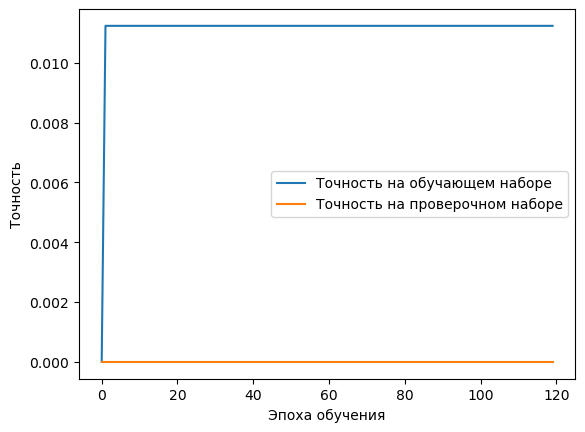

1/1 [==============================] - 0s 124ms/step


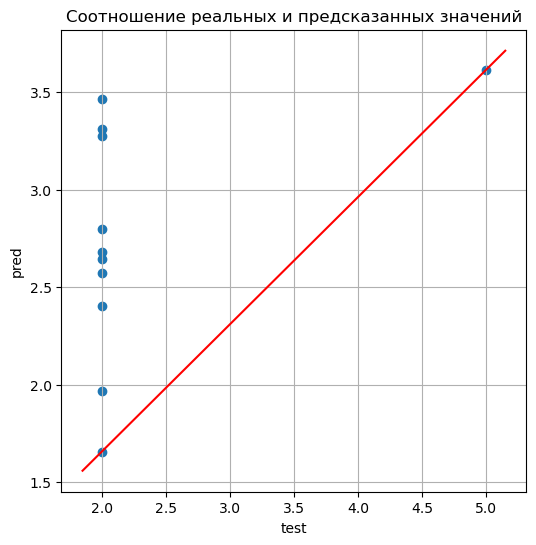

[2.] [2.4034896]
[2.] [3.3121529]
[2.] [2.5738144]
[5.] [3.6152477]
[2.] [3.4677048]
[2.] [2.7974238]
[2.] [1.9664205]
[2.] [3.2770739]
[2.] [2.645752]
[2.] [2.6815999]
[2.] [1.657461]
Epoch 1/120
23/23 [==============================] - 3s 22ms/step - loss: 18.0171 - accuracy: 0.0000e+00 - mape: 143.9086 - val_loss: 26.4885 - val_accuracy: 0.0000e+00 - val_mape: 141.4369
Epoch 2/120
23/23 [==============================] - 0s 6ms/step - loss: 14.3489 - accuracy: 0.0000e+00 - mape: 122.4510 - val_loss: 20.9986 - val_accuracy: 0.0000e+00 - val_mape: 121.2818
Epoch 3/120
23/23 [==============================] - 0s 6ms/step - loss: 11.2155 - accuracy: 0.0112 - mape: 102.9498 - val_loss: 16.6831 - val_accuracy: 0.0000e+00 - val_mape: 103.4647
Epoch 4/120
23/23 [==============================] - 0s 6ms/step - loss: 8.8402 - accuracy: 0.0112 - mape: 85.7144 - val_loss: 12.9370 - val_accuracy: 0.0000e+00 - val_mape: 86.0344
Epoch 5/120
23/23 [==============================] - 0s 6ms/step - lo

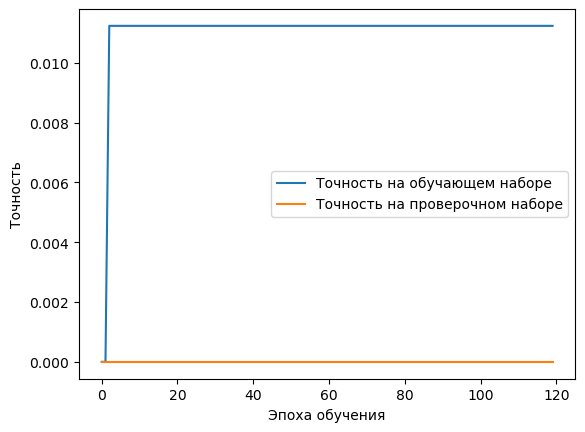

1/1 [==============================] - 0s 125ms/step


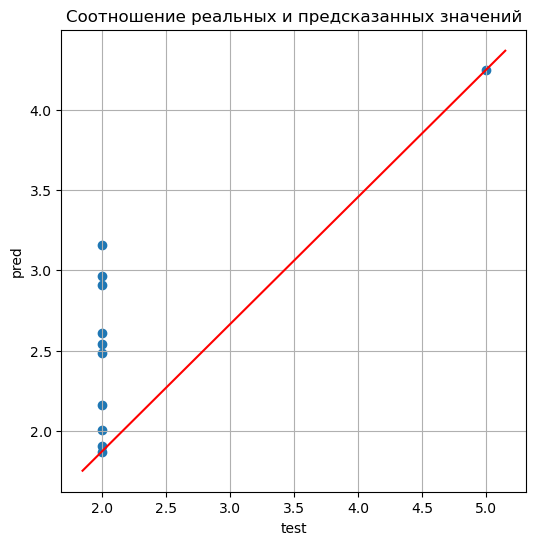

[2.] [2.6108046]
[2.] [1.9074368]
[2.] [2.9675646]
[5.] [4.2471733]
[2.] [2.0056412]
[2.] [2.5410929]
[2.] [2.4831438]
[2.] [3.1575801]
[2.] [2.9088311]
[2.] [2.164229]
[2.] [1.8726344]


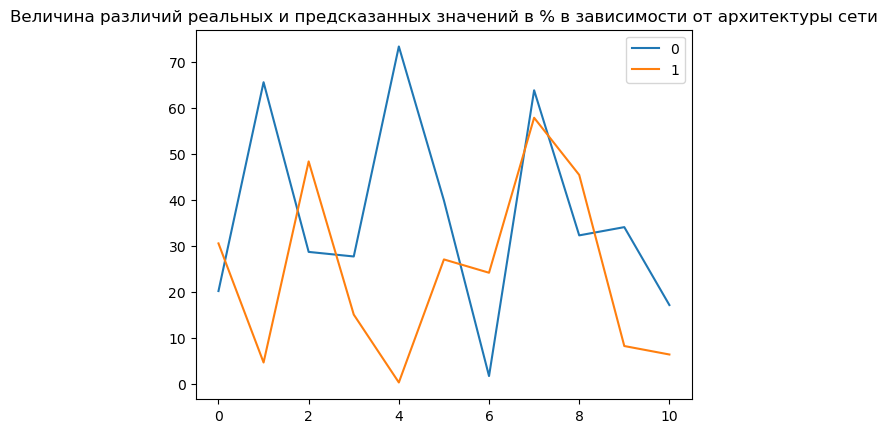

Среднее значение %-та различий реальных и предсказанных значений: model_1: 36.768, model_2: 24.363


,0,1
0,[20.174479484558105],[30.54022789001465]
1,[65.6076431274414],[4.628157615661621]
2,[28.690719604492188],[48.37822914123535]
3,[27.695045471191403],[15.056533813476564]
4,[73.38523864746094],[0.2820611000061035]
5,[39.87119197845459],[27.054643630981445]
6,[1.6789734363555908],[24.157190322875977]
7,[63.85369300842285],[57.87900686264038]
8,[32.28759765625],[45.441555976867676]
9,[34.07999277114868],[8.211445808410645]


In [ ]:
dl_method_estim(get_dl_list(238),x_train, x_test, y_train, y_test)

In [ ]:
df_fl['Заключение'].values

array([1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 3., 2., 3., 2., 2., 2., 2.,
       2., 2., 2., 2., 4., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 6., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 3., 7., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 3., 3., 2., 2., 2., 2., 2., 2., 6., 2., 2.,
       2., 2., 2., 8., 2., 5., 5., 2., 2., 3., 2., 2., 2., 3., 2., 5., 5.,
       5., 5., 5., 5., 5., 5., 5., 5.])